# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados para Almendralejo por la Comunidad Extremadura desde aquí [fuente](https://saludextremadura.ses.es/web/casospositivos). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas que añadan aunque sea un poco de información a lo que está ocurriendo.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, WeekdayLocator,RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#url de la fuente de datos
path_fuente_datos='datos/almendralejo.xlsx'
path_fuente_datos_github='https://github.com/mharias/covid_almendralejo/blob/main/datos/almendralejo.csv?raw=true'
#path_fuente_datos_github_csv='https://github.com/mharias/covid_almendralejo/blob/main/datos/covid_almendralejo.csv?raw=true'

poblacion_almendralejo = 33474 #https://es.wikipedia.org/wiki/Almendralejo


Leemos los datos en un `pandas`

In [4]:
datos = pd.read_csv(path_fuente_datos_github,sep=',')

In [5]:
datos

,date,Casos positivos,Activos,media_7,ia14,ia_ratio
0,2020-10-18,24,NaN,NaN,NaN,NaN
1,2020-10-19,3,NaN,NaN,NaN,NaN
2,2020-10-20,16,198.0,NaN,NaN,NaN
3,2020-10-21,24,NaN,NaN,NaN,NaN
4,2020-10-22,23,NaN,NaN,NaN,NaN
5,2020-10-23,9,NaN,NaN,NaN,NaN
6,2020-10-24,26,221.0,18.0,NaN,NaN
7,2020-10-25,11,NaN,16.0,NaN,NaN
8,2020-10-26,4,NaN,16.0,NaN,NaN
9,2020-10-27,8,258.0,15.0,NaN,NaN


In [6]:
#datos = pd.read_excel(path_fuente_datos,skiprows=2)

veamos una rápida descripción de la información:

y un muestreo de valores y de algunas columnas de interés:

In [7]:
datos.tail()

,date,Casos positivos,Activos,media_7,ia14,ia_ratio
157,2021-03-24,0,NaN,1.0,65.722650,1.375000
158,2021-03-25,2,NaN,1.0,71.697437,1.090909
159,2021-03-26,1,NaN,1.0,62.735257,0.913043
160,2021-03-27,1,NaN,1.0,62.735257,0.875000
161,2021-03-28,3,NaN,NaN,NaN,NaN


In [8]:
datos['date']=pd.to_datetime(datos['date'],format='%Y-%m-%d')

In [9]:
datos['media_7']=datos['Casos positivos'].rolling(window=7).mean().round()

In [10]:
datos['ia14'] = datos['Casos positivos'].rolling(window=14).sum()/poblacion_almendralejo*100000

In [11]:
datos['ia_ratio'] = datos['ia14'].pct_change(periods=7).add(1)

In [12]:
datos.tail(19)

,date,Casos positivos,Activos,media_7,ia14,ia_ratio
143,2021-03-10,2,NaN,0.0,20.911752,0.636364
144,2021-03-11,0,NaN,0.0,20.911752,0.636364
145,2021-03-12,4,NaN,1.0,32.861325,1.100000
146,2021-03-13,1,NaN,1.0,35.848718,1.333333
147,2021-03-14,0,NaN,1.0,35.848718,1.333333
148,2021-03-15,1,NaN,1.0,32.861325,1.375000
149,2021-03-16,1,NaN,1.0,35.848718,2.400000
150,2021-03-17,7,NaN,2.0,47.798291,2.285714
151,2021-03-18,6,NaN,3.0,65.722650,3.142857
152,2021-03-19,1,NaN,2.0,68.710044,2.090909


# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [13]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'royalblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'ia_ratio'
IA='ia14'
avg='media_7'

casos_nuevos='Casos positivos'
activos='Activos'

ventana_IA=14
titulo_positivos  = 'Almendralejo: casos positivos comunicados diarios y media 7 días'
titulo_activos = 'Almendralejo: casos activos comunicados'
titulo_IA='Almendralejo: IA14, casos acumulados de los últimos 14 días por 100.000 habitantes\n\
En rojo ratio de la IA14 con respecto a la de 7 días anteriores.'
fuente_positivos='Salud, Junta Extremadura'
path_fuente_positivos='https://saludextremadura.ses.es/web/casospositivos'

fuente_activos='Ayto Almendralejo'
path_fuente_activos='https://www.almendralejo.es/noticias.php'

autor='@walyt'


y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
path='graficos/'
    


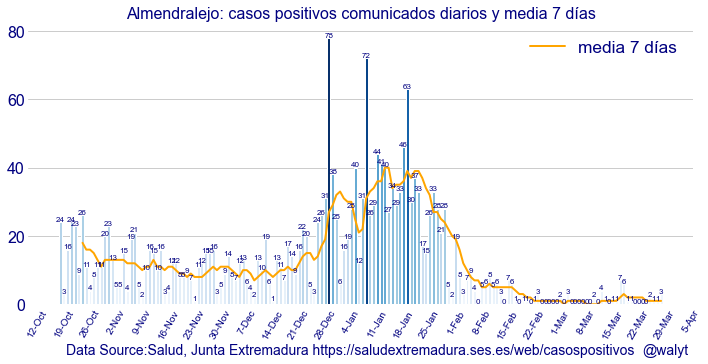

In [14]:
colores = sns.color_palette("Blues_r", 5)
colores = sns.color_palette('mako', 5)
plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


#colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())
colors = cm.Blues(datos[casos_nuevos]/datos[casos_nuevos].max())


barras = ax1.bar(datos['date'],datos[casos_nuevos],color=colors)
ax1.plot(datos['date'],datos[avg],color='orange',lw=2,label='media 7 días')

ax1.yaxis.set_tick_params(labelsize=16,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=10,labelcolor='navy',width=0,rotation=60)
ax1.set_title(titulo_positivos,size=16,color='navy')

for barra in barras:
    height = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2., 1*height,
            '%d' % int(height),ha='center',fontsize=8, va='bottom',color='navy')




fmt = '%.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-d-%b')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(WeekdayLocator([datetime.today().weekday()])) #incluye hoy y 7 antes
ax1.set_xticks(ax1.get_xticks()[:])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large')
plt.setp(legend.get_texts(), color='navy')

ax1.grid(True,axis='y')
f.text(0.1, 0.01, 'Data Source:{} {}'.format(fuente_positivos,path_fuente_positivos), horizontalalignment='left',
     verticalalignment='center', fontsize=14,color=color_titulos)
f.text(0.9,0.01,'{}'.format(autor),
         verticalalignment='center',fontsize=14,horizontalalignment='left',color=color_titulos)
[spine.set_visible(False) for spine in ax1.spines.values()]
#f.tight_layout(w_pad=0,h_pad=5,pad=1)

f.tight_layout()
f.savefig('graficos/almendralejo_nuevos_casos.png',dpi=200,bbox_inches='tight')

No handles with labels found to put in legend.


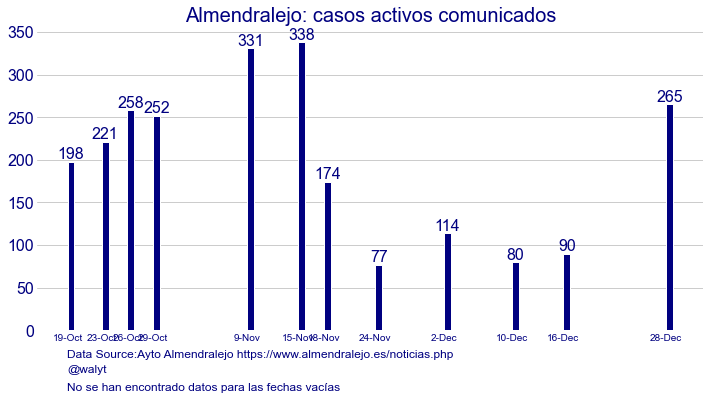

In [15]:
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())

colors='navy'
barras = ax1.bar(datos['date'],datos[activos],color=colors)
#ax1.plot(datos['date'],datos[avg],color='navy',lw=3,label='media 7 días')

ax1.yaxis.set_tick_params(labelsize=16,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=10,labelcolor='navy',width=0)
ax1.set_title(titulo_activos,size=20,color='navy')
lista_xticks=[]
for barra in barras:
    height = barra.get_height()
    try: 
        ax1.text(barra.get_x() + barra.get_width()/2., 1*height,'%d' % int(height),ha='center',fontsize=16, va='bottom',color='navy')
        lista_xticks.append(barra.get_x())
    except:
        continue

fmt = '%.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-d-%b')
ax1.xaxis.set_major_formatter(XmajorFmt)
#ax1.xaxis.set_major_locator(WeekdayLocator([0]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])
ax1.set_xticks(lista_xticks)


legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large')
plt.setp(legend.get_texts(), color='navy')

ax1.grid(True,axis='y')
f.text(0.1, -0.0, 'Data Source:{} {}'.format(fuente_activos,path_fuente_activos), horizontalalignment='left',
     verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.1,-0.05,'{}'.format(autor),
         fontsize=12,horizontalalignment='left',color=color_titulos)
f.text(0.1,-0.1,'No se han encontrado datos para las fechas vacías'.format(autor),
         fontsize=12,horizontalalignment='left',color=color_titulos)

[spine.set_visible(False) for spine in ax1.spines.values()]
f.tight_layout(w_pad=0,h_pad=2,pad=1)

#f.tight_layout()
f.savefig('graficos/almendralejo_activos.png',dpi=200,bbox_inches='tight')

No handles with labels found to put in legend.


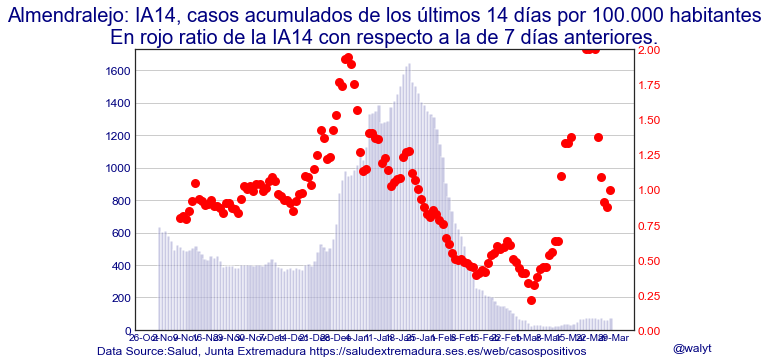

In [16]:
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())


ax1.bar(datos['date'],datos[IA],color='navy',lw=3,alpha=.3)

ax1.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=10,labelcolor='navy',width=0)
ax1.set_title(titulo_IA,size=20,color='navy')



fmt = '%00.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-d-%b')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(WeekdayLocator([0,4]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large')
plt.setp(legend.get_texts(), color='navy')

ax1.grid(True,axis='y')

ax2 = ax1.twinx()
ax2.scatter(datos['date'],datos[clave_ratio],color='red',lw=3,label='ratio ia14 a 7 días')
ax2.xaxis.set_tick_params(labelsize=10,labelcolor='navy',width=0)
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='red',width=0)
XmajorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(XmajorFmt)
ax2.xaxis.set_major_locator(WeekdayLocator([0]))
ax2.set_ylim(0,2)
f.text(0.1, 0.01, 'Data Source:{} {}'.format(fuente_positivos,path_fuente_positivos), horizontalalignment='left',
     verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.9,+0.01,'{}'.format(autor),
         fontsize=12,horizontalalignment='left',color=color_titulos)
[spine.set_visible(False) for spine in ax1.spines.values()]
f.tight_layout(w_pad=0,h_pad=2,pad=1)

#f.tight_layout()
f.savefig('graficos/almendralejo_ia14.png',dpi=200,bbox_inches='tight')

In [17]:
datos.to_csv('datos/almendralejo.csv',index=False,sep=',')

In [18]:
def grafico_EPG(datos):
    
    IA14='ia14'
    casos='Casos positivos'
    p7 = 'p7_avg7'
    fecha = 'date'
    titulo = 'Evolución de Empiric Potential Growth en {}\n'.format('Almendralejo') 
    fuente_modelo = 'Fuente del modelo @biocomsc \n'  
    titulo = titulo + fuente_modelo
    un_dia=timedelta(days=1)
    dos_dias=timedelta(days=2)
    cinco_dias=timedelta(days=5)
    seis_dias=timedelta(days=6)
    cuatro_dias=timedelta(days=4)
    path='graficos/'
    nombre_fichero=path+'EPG_de_{}'.format('Almendralejo')
    
    def calculo_p7(x):
        fecha_actual=x['date']
        try:
            valor = (datos.loc[datos['date']==fecha_actual+un_dia,casos].values[0]+\
            datos.loc[datos['date']==(fecha_actual),casos].values[0]+\
            datos.loc[datos['date']==(fecha_actual-un_dia),casos].values[0])/\
            (datos.loc[datos['date']==(fecha_actual-cuatro_dias),casos].values[0]+\
             datos.loc[datos['date']==(fecha_actual-seis_dias),casos].values[0]+\
             datos.loc[datos['date']==(fecha_actual-cinco_dias),casos].values[0])
        except:
            valor = np.NaN
        return valor
    
    datos[p7] = datos.apply(calculo_p7,axis=1)
    datos[p7] = datos[p7].rolling(window=7).mean()
    datos = datos.reset_index()
    datos = datos.drop(['index'],axis=1)
    datos=datos[[fecha,IA14,p7]]
    
    color_rojo = 'red'
    color_verde = 'green'
    color_amarillo = 'yellow'
    colores = sns.color_palette("Blues",datos.shape[0])[::]
    color_texto = 'navy'
    eje_X = ' Incidencia Acumulada a 14 días'
    eje_Y = 'Parámetro \u03C1'+'7'

    fuente_modelo = 'https://biocomsc.upc.edu/en/shared/20200412_report_web_27.pdf'


    x_max = round((datos[IA14].max()//100+1)*100,-2)
    y_max = min(3,round(datos[p7].max(),1))
    rango = np.arange(1,x_max,1)

    fig,ax = plt.subplots(figsize=(10, 5), dpi=144)
    ax.set_xlim(0,x_max)
    ax.set_ylim(0,y_max)
    ax.grid(False,axis='both')
  
    ax.set_ylabel(eje_Y,size=14,color='black')
    ax.set_xlabel(eje_X,size=14,color='black')
    rango=np.arange(0,x_max,1)
    
    ax.fill_between(rango, 0, 30/rango,
                     facecolor="blue", # The fill color
                 color=color_verde,       # The outline color
                 alpha=0.5) 
    ax.fill_between(rango, 30/rango, 100/rango,
                 facecolor='blue', # The fill color
                 color=color_amarillo,       # The outline color
                 alpha=0.5) 
    ax.fill_between(rango,100/rango,10,
                 facecolor="blue", # The fill color
                 color=color_rojo,       # The outline color
                 alpha=0.5)
    
    ax.set_title(titulo, fontsize=12)

    ax.scatter(datos[IA14],datos[p7],color=colores,marker='o',
               s=2)

    x_init,y_init = datos.iloc[8][[IA14,p7]]
    for i in range(0,datos.shape[0]):
        ax.plot(datos.loc[i:i+1,IA14],datos.loc[i:i+1][p7],
            color=colores[::][i],lw=2,scaley=False)

        style = dict(size=8, color=colores[i],weight='bold')
        if (i==7) | (i % 7 == 0) | (i==(datos.shape[0]-2)):
            texto = ax.annotate(datos.loc[i,fecha].strftime('%d-%b'),
                                xy=(datos.loc[i,IA14],datos.loc[i,p7]),
                                xycoords='data',
                                xytext=(-20, 10), 
                                textcoords='offset points',
                                **style)
    plt.savefig(nombre_fichero,dpi=144)  
    plt.show()
    return 

<ipython-input-18-9388e5c91090>:21: RuntimeWarning: divide by zero encountered in long_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,casos].values[0]+\
<ipython-input-18-9388e5c91090>:61: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-18-9388e5c91090>:65: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-18-9388e5c91090>:69: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


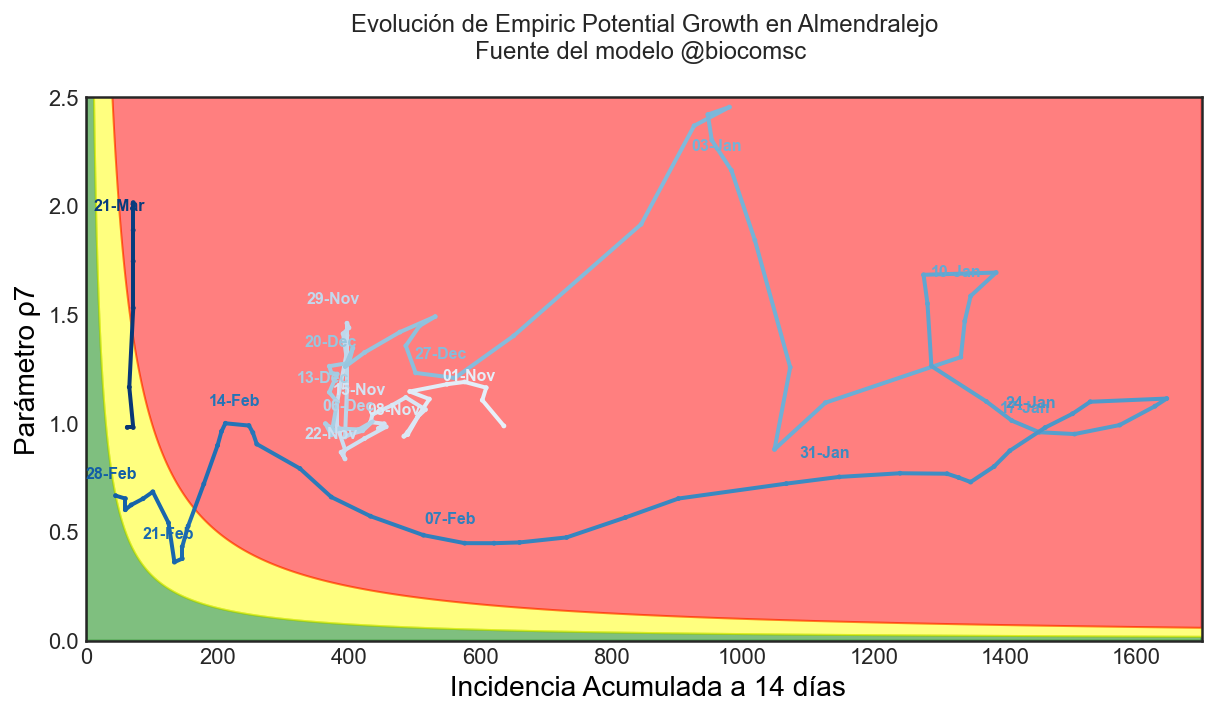

In [19]:
grafico_EPG(datos)

No handles with labels found to put in legend.


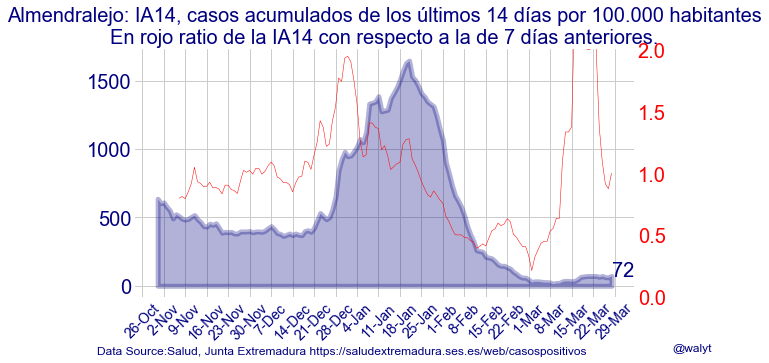

In [20]:
colores = sns.color_palette("Blues_r", 5)

plt.style.use('seaborn-white')
#f.suptitle(titulo,fontsize=20,x=0.5,y=1,color=color_titulos)
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(1,1,1,)


colors = cm.RdYlBu_r(datos[casos_nuevos]/datos[casos_nuevos].max())


ax1.fill_between(datos['date'],datos[IA],color='navy',lw=5,alpha=.3)

ax1.yaxis.set_tick_params(labelsize=20,labelcolor='navy')
ax1.xaxis.set_tick_params(labelsize=14,rotation=45,labelcolor='navy',width=0)
ax1.set_title(titulo_IA,size=20,color='navy')



fmt = '%00.0f' # Format you want the ticks, e.g. '40%'
yticks = ticker.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
#ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

XmajorFmt = DateFormatter('%-d-%b')
ax1.xaxis.set_major_formatter(XmajorFmt)
ax1.xaxis.set_major_locator(WeekdayLocator([0,4]))
#ax1.set_xticks(ax1.get_xticks()[1:-1])

legend = ax1.legend(framealpha=0,fancybox=True,fontsize='x-large')
plt.setp(legend.get_texts(), color='navy')

ax1.grid(True,axis='both')

ax2 = ax1.twinx()
ax2.plot(datos['date'],datos[clave_ratio],color='red',lw=.5,label='ratio ia14 a 7 días')
ax2.xaxis.set_tick_params(labelsize=10,labelcolor='navy',width=0)
ax2.yaxis.set_tick_params(labelsize=20,labelcolor='red',width=0)
XmajorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(XmajorFmt)
ax2.xaxis.set_major_locator(WeekdayLocator([0]))
ax2.set_ylim(0,2)
style = dict(size=20, color=color_titulos,weight='normal')
texto = ax1.annotate('{:0.0f}'.format(datos.iloc[-1][IA]),
                            xy=(datos.iloc[-1]['date'],datos.iloc[-1][IA]),
                            xycoords='data',
                            xytext=(0, 0), 
                            textcoords='offset points',
                            **style)

f.text(0.1, 0.01, 'Data Source:{} {}'.format(fuente_positivos,path_fuente_positivos), horizontalalignment='left',
     verticalalignment='center', fontsize=12,color=color_titulos)
f.text(0.9,+0.01,'{}'.format(autor),
         fontsize=12,horizontalalignment='left',color=color_titulos)
[spine.set_visible(False) for spine in ax1.spines.values()]
[spine.set_visible(False) for spine in ax2.spines.values()]
f.tight_layout(w_pad=0,h_pad=2,pad=1)

#f.tight_layout()
f.savefig('graficos/almendralejo_ia14.png',dpi=200,bbox_inches='tight')